In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings("ignore")

In [2]:
train_dtypes={"Id": object,
"groupId":"category",
"matchId":"category",
"assists":"int8",
"boosts":"int8",
"damageDealt":"float16",
"DBNOs":"int8",
"headshotKills":"int8",
"heals":"int8",
"killPlace":"int8",
"killPoints":"int16",
"kills":"int8",
"killStreaks":"int8",
"longestKill":"float16",
"matchDuration":"int16",
"matchType":"category",
"maxPlace":"int8",
"numGroups":"int8",
"rankPoints":"int16",
"revives":"int8",
"rideDistance":"float16",
"roadKills":"int8",
"swimDistance":"float16",
"teamKills":"int8",
"vehicleDestroys":"int8",
"walkDistance":"float16",
"weaponsAcquired":"int16",
"winPoints":"int16",
"winPlacePerc":"float16"}

In [3]:
train = pd.read_csv('all/train_V2.csv',dtype=train_dtypes)


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446966 entries, 0 to 4446965
Data columns (total 29 columns):
Id                 object
groupId            category
matchId            category
assists            int8
boosts             int8
damageDealt        float16
DBNOs              int8
headshotKills      int8
heals              int8
killPlace          int8
killPoints         int16
kills              int8
killStreaks        int8
longestKill        float16
matchDuration      int16
matchType          category
maxPlace           int8
numGroups          int8
rankPoints         int16
revives            int8
rideDistance       float16
roadKills          int8
swimDistance       float16
teamKills          int8
vehicleDestroys    int8
walkDistance       float16
weaponsAcquired    int16
winPoints          int16
winPlacePerc       float16
dtypes: category(3), float16(6), int16(5), int8(14), object(1)
memory usage: 321.9+ MB


In [5]:
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    #start_mem = df.memory_usage().sum() / 1024**2
    #print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    for col in df.columns:
        col_type = df[col].dtype
        if col_type == object:
            num_unique_values = len(df[col].unique())
            num_total_values = len(df[col])
            if num_unique_values / num_total_values < 0.5:
                df[col] = df[col].astype('category')
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)

    #end_mem = df.memory_usage().sum() / 1024**2
    #print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    #print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    return df

In [6]:
train.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00000,0,0,0,60,...,0,0.000000,0,0.000000,0,0,244.75,1,1466,0.444336
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.50000,0,0,0,57,...,0,0.004501,0,11.039062,0,0,1434.00,5,0,0.640137
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00000,0,0,0,47,...,0,0.000000,0,0.000000,0,0,161.75,2,0,0.775391
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90625,0,0,0,75,...,0,0.000000,0,0.000000,0,0,202.75,3,0,0.166748
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00000,0,0,0,45,...,0,0.000000,0,0.000000,0,0,49.75,2,0,0.187500


In [7]:
train.isnull().sum()

Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       1
dtype: int64

In [8]:
train[train.winPlacePerc.isnull()]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
2744604,f70c74418bb064,12dfbede33f92b,224a123c53e008,0,0,0.0,0,0,0,1,...,0,0.0,0,0.0,0,0,0.0,0,0,NaN


In [9]:
train.drop(2744604, inplace=True)

Text(0.5, 1.0, 'playersJoined')

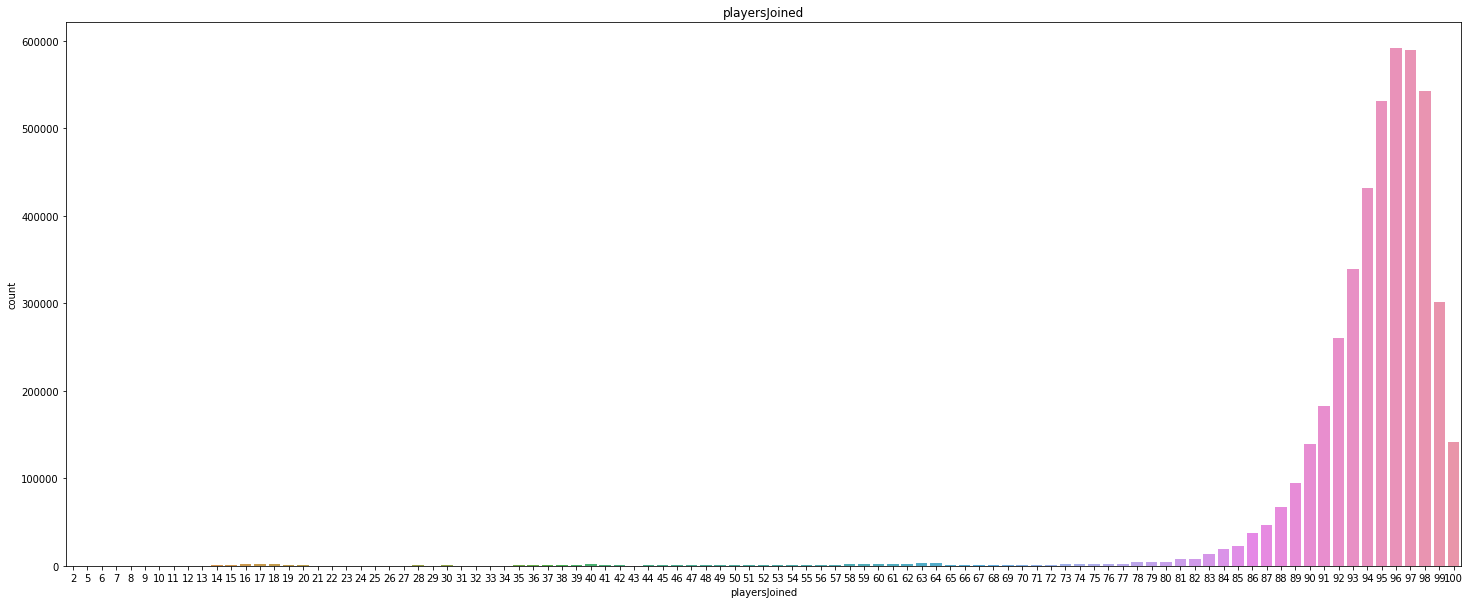

In [18]:
%matplotlib inline
# playersJoined
train['playersJoined'] = train.groupby('matchId')['matchId'].transform('count')
plt.figure(figsize=(25,10))
sns.countplot(train['playersJoined'])
plt.title('playersJoined')

In [19]:
# Create normalized features
train['killsNorm'] = train['kills']*((100-train['playersJoined'])/100 + 1)
train['damageDealtNorm'] = train['damageDealt']*((100-train['playersJoined'])/100 + 1)
train['maxPlaceNorm'] = train['maxPlace']*((100-train['playersJoined'])/100 + 1)
train['matchDurationNorm'] = train['matchDuration']*((100-train['playersJoined'])/100 + 1)
# Compare standard features and normalized features
to_show = ['Id', 'kills','killsNorm','damageDealt', 'damageDealtNorm', 'maxPlace', 'maxPlaceNorm', 'matchDuration', 'matchDurationNorm']
train[to_show][0:11]

,Id,kills,killsNorm,damageDealt,damageDealtNorm,maxPlace,maxPlaceNorm,matchDuration,matchDurationNorm
0,7f96b2f878858a,0,0.00,0.000000,0.000000,28,29.12,1306,1358.24
1,eef90569b9d03c,0,0.00,91.500000,99.735000,26,28.34,1777,1936.93
2,1eaf90ac73de72,0,0.00,68.000000,69.360000,50,51.00,1318,1344.36
3,4616d365dd2853,0,0.00,32.906250,35.867812,31,33.79,1436,1565.24
4,315c96c26c9aac,1,1.03,100.000000,103.000000,97,99.91,1424,1466.72
5,ff79c12f326506,1,1.05,100.000000,105.000000,28,29.40,1395,1464.75
6,95959be0e21ca3,0,0.00,0.000000,0.000000,28,28.84,1316,1355.48
7,311b84c6ff4390,0,0.00,8.539062,8.880625,96,99.84,1967,2045.68
8,1a68204ccf9891,0,0.00,51.593750,53.141562,28,28.84,1375,1416.25
9,e5bb5a43587253,0,0.00,37.281250,38.399687,29,29.87,1930,1987.90


In [20]:
train['healsandboosts'] = train['heals'] + train['boosts']
train[['heals', 'boosts', 'healsandboosts']].tail()

,heals,boosts,healsandboosts
4446961,0,0,0
4446962,0,1,1
4446963,0,0,0
4446964,2,4,6
4446965,1,2,3


In [21]:
train['totalDistance'] = train['rideDistance'] + train['walkDistance'] + train['swimDistance']
train['killsWithoutMoving'] = ((train['kills'] > 0) & (train['totalDistance'] == 0))

In [22]:
# Create headshot_rate feature
train['headshot_rate'] = train['headshotKills'] / train['kills']
train['headshot_rate'] = train['headshot_rate'].fillna(0)

In [24]:
train[train['killsWithoutMoving'] == True].shape
train[train['killsWithoutMoving'] == True].head(5)

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,winPlacePerc,playersJoined,killsNorm,damageDealtNorm,maxPlaceNorm,matchDurationNorm,healsandboosts,totalDistance,killsWithoutMoving,headshot_rate
1824,b538d514ef2476,0eb2ce2f43f9d6,35e7d750e442e2,0,0,593.00,0,0,3,18,...,0.856934,58,8.52,842.0600,21.30,842.06,3,0.0,True,0.0
6673,6d3a61da07b7cb,2d8119b1544f87,904cecf36217df,2,0,346.50,0,0,6,33,...,0.600098,42,4.74,547.4700,17.38,2834.52,6,0.0,True,0.0
11892,550398a8f33db7,c3fd0e2abab0af,db6f6d1f0d4904,2,0,1750.00,0,4,5,3,...,0.894531,21,35.80,3132.5000,35.80,1607.42,5,0.0,True,0.2
14631,58d690ee461e9d,ea5b6630b33d67,dbf34301df5e53,0,0,157.75,0,0,0,69,...,0.000000,73,1.27,200.3425,24.13,1014.73,0,0.0,True,0.0
15591,49b61fc963d632,0f5c5f19d9cc21,904cecf36217df,0,0,100.00,0,1,0,37,...,0.300049,42,1.58,158.0000,17.38,2834.52,0,0.0,True,1.0


In [25]:
train.drop(train[train['killsWithoutMoving'] == True].index, inplace=True)

In [26]:
train.drop(train[train['roadKills'] > 10].index, inplace=True)

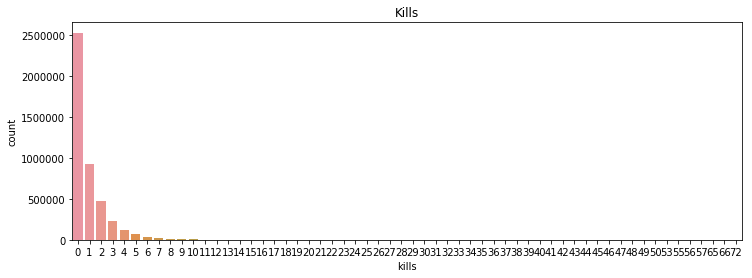

In [27]:
plt.figure(figsize=(12,4))
sns.countplot(data=train, x=train['kills']).set_title('Kills')
plt.show()

In [29]:
pd.set_option('max_column', 50)

In [30]:
train[train['kills'] > 30].head(10)

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,playersJoined,killsNorm,damageDealtNorm,maxPlaceNorm,matchDurationNorm,healsandboosts,totalDistance,killsWithoutMoving,headshot_rate
57978,9d8253e21ccbbd,ef7135ed856cd8,37f05e2a01015f,9,0,3724.0,0,7,0,2,1000,35,3,105.8125,1798,normal-duo-fpp,8,7,-1,0,0.0,0,0.0,0,0,48.812500,48,1500,0.856934,16,64.40,6852.16,14.72,3308.32,0,48.812500,False,0.200000
87793,45f76442384931,b3627758941d34,37f05e2a01015f,8,0,3088.0,0,8,27,3,1000,31,3,95.3125,1798,normal-duo-fpp,8,7,-1,0,0.0,0,0.0,0,0,780.500000,45,1500,1.000000,16,57.04,5681.92,14.72,3308.32,27,780.500000,False,0.258065
156599,746aa7eabf7c86,5723e7d8250da3,f900de1ec39fa5,21,0,5480.0,0,12,7,4,0,48,6,81.9375,1798,normal-solo-fpp,11,11,1500,0,0.0,0,0.0,0,0,23.703125,61,0,0.700195,11,90.72,10357.20,20.79,3398.22,7,23.703125,False,0.250000
160254,15622257cb44e2,1a513eeecfe724,db413c7c48292c,1,0,4032.0,0,40,0,1,1000,42,5,266.2500,844,normal-squad-fpp,8,8,-1,0,0.0,0,0.0,1,0,718.500000,16,1500,1.000000,62,57.96,5564.16,11.04,1164.72,0,718.500000,False,0.952381
180189,1355613d43e2d0,f863cd38c61dbf,39c442628f5df5,5,0,3172.0,0,6,15,1,0,35,3,102.5000,1796,normal-solo-fpp,9,6,1500,0,0.0,0,0.0,0,0,71.500000,41,0,1.000000,11,66.15,5995.08,17.01,3394.44,15,71.500000,False,0.171429
334400,810f2379261545,7f3e493ee71534,f900de1ec39fa5,20,0,6616.0,0,13,5,1,0,65,7,73.8750,1798,normal-solo-fpp,11,11,1500,0,0.0,0,0.0,0,0,1036.000000,60,0,1.000000,11,122.85,12504.24,20.79,3398.22,5,1036.000000,False,0.200000
353128,f3e9746e3ff151,4bc1f00f07b304,a9e84c456cc859,2,0,3834.0,0,9,5,1,0,39,3,264.0000,1795,normal-solo-fpp,13,10,1500,0,0.0,0,0.0,0,0,124.187500,42,0,1.000000,13,72.93,7169.58,24.31,3356.65,5,124.187500,False,0.230769
457829,265e23756baa0b,9d94424171c2a1,664dee9ed8f646,3,0,2908.0,0,27,2,1,0,33,4,439.2500,827,normal-squad,5,5,1500,0,0.0,0,0.0,1,0,382.500000,15,0,1.000000,38,53.46,4710.96,8.10,1339.74,2,382.500000,False,0.818182
488335,31a0682922ef45,275a27a3ee4cc8,3037f74ef8a3a3,2,0,3056.0,0,9,0,1,1000,33,5,98.0000,892,normal-solo-fpp,18,14,-1,0,0.0,0,0.0,0,0,35.312500,31,1500,1.000000,20,59.40,5500.80,32.40,1605.60,0,35.312500,False,0.272727
662650,dd424a8b74bd49,ac9dea6d62f2e6,8a728def0644be,9,0,3454.0,38,9,4,1,1000,34,4,124.0000,1198,normal-squad-fpp,14,14,-1,0,0.0,0,0.0,0,0,111.125000,25,1500,0.230835,54,49.64,5042.84,20.44,1749.08,4,111.125000,False,0.264706


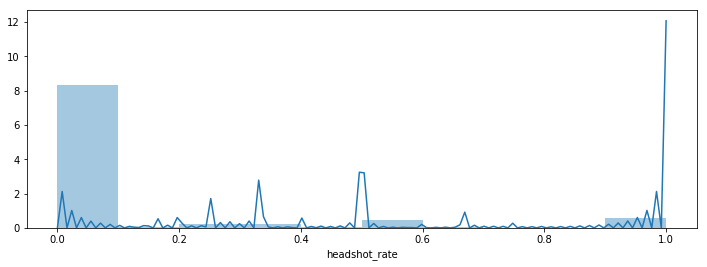

In [31]:
plt.figure(figsize=(12,4))
sns.distplot(train['headshot_rate'], bins=10)
plt.show()

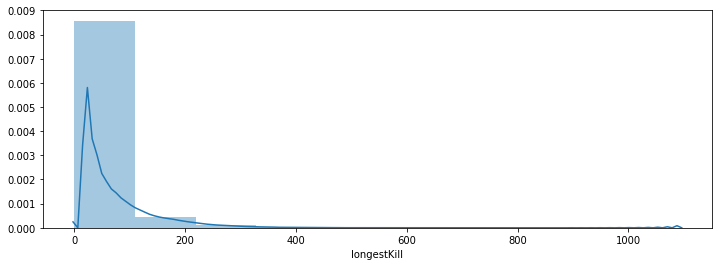

In [32]:
plt.figure(figsize=(12,4))
sns.distplot(train['longestKill'], bins=10)
plt.show()

In [33]:
train.drop(train[train['longestKill'] >= 1000].index, inplace=True)

In [34]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4445405 entries, 0 to 4446965
Data columns (total 38 columns):
Id                    object
groupId               category
matchId               category
assists               int8
boosts                int8
damageDealt           float16
DBNOs                 int8
headshotKills         int8
heals                 int8
killPlace             int8
killPoints            int16
kills                 int8
killStreaks           int8
longestKill           float16
matchDuration         int16
matchType             category
maxPlace              int8
numGroups             int8
rankPoints            int16
revives               int8
rideDistance          float16
roadKills             int8
swimDistance          float16
teamKills             int8
vehicleDestroys       int8
walkDistance          float16
weaponsAcquired       int16
winPoints             int16
winPlacePerc          float16
playersJoined         int64
killsNorm             float64
damageDea

In [35]:
train['groupId'].cat.codes

0             9899
1            13348
2            13605
3            21482
4            28121
5             5198
6             5678
7            29760
8             9191
9            15030
10           24992
11           31246
12           27652
13            7736
14           26882
15           32288
16           31232
17            6042
18           14043
19           15704
20           20898
21           27167
22           15498
23           15610
24           26788
25           18061
26            1133
27            2152
28           16858
29           16983
            ...   
4446936     867814
4446937    1736984
4446938     197140
4446939    1370613
4446940    1300417
4446941     692528
4446942     152386
4446943     168427
4446944    1660022
4446945    1399423
4446946    2023394
4446947     269409
4446948    1832699
4446949     676816
4446950    2024739
4446951    1001219
4446952     904705
4446953     218504
4446954    2025802
4446955     917977
4446956      39679
4446957    1